In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition
##### Flat Acquisition using csv files

In [7]:
movies = pd.read_csv('./data/movies.csv')
# genome_scores = pd.read_csv('./data/genome-scores.csv')
# genome_tags = pd.read_csv('./data/genome-tags.csv')
ratings = pd.read_csv('./data/ratings.csv')
tags = pd.read_csv('./data/tags.csv')

In [9]:
# print the first 5 rows of the movies, ratings, and tags dataframes
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732      

In [29]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['mean', 'count'], 'timestamp': ['mean']})
grouped_ratings.columns = ['mean_rating', 'rating_count', 'mean_timestamp']
grouped_ratings = grouped_ratings.astype({'mean_timestamp': 'int'})

# Merge dei dataset movies e ratings
# rimuove i film che non hanno rating
movies_ratings = pd.merge(movies, grouped_ratings, on='movieId')
movies_ratings.head()

,movieId,title,genres,mean_rating,rating_count,mean_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309,1153152210
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228,1122310117
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804,980602256
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523,942460471
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714,1004723013


In [30]:
# mantiene i duplicati, per rimuoverli usare .apply[set, list]
# tags.groupby('movieId')['tag'].apply(set)
new_tags = tags.groupby('movieId')['tag'].apply(set).apply(list)

df = pd.merge(movies_ratings, new_tags, on='movieId')
df.head()

,movieId,title,genres,mean_rating,rating_count,mean_timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309,1153152210,"[action figure, soothing, adventure, Tom Hanks..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228,1122310117,"[Children, game, Fantasy, adventure, Dynamic C..."
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804,980602256,"[comedinha de velhinhos engraÃƒÂ§ada, sequel, ..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523,942460471,"[revenge, CLV, single mother, characters, base..."
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714,1004723013,"[Fantasy, baby, sequel, Diane Keaton, aging, C..."


## Data Visualization

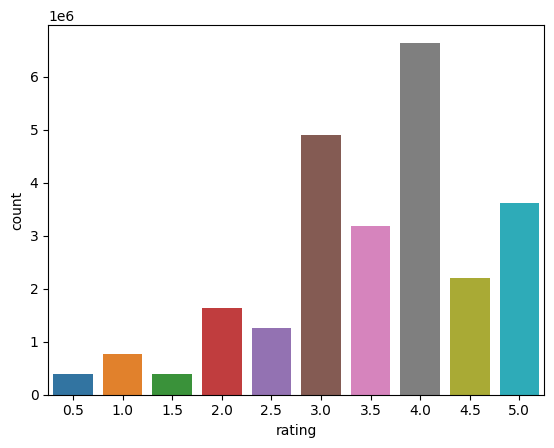

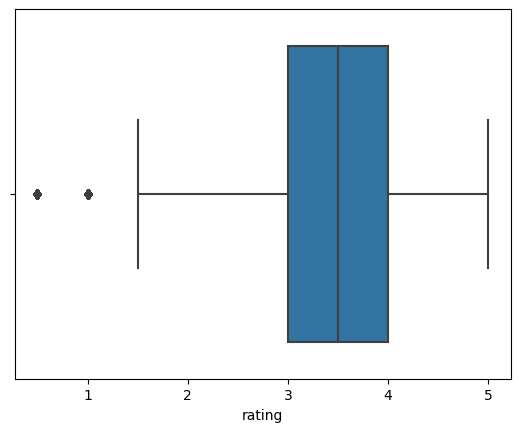

In [31]:
# Per capire la distribuzione dei rating
sns.countplot(x='rating', data=ratings)
plt.show()

sns.boxplot(x='rating', data=ratings)
plt.show()

In [33]:
# Observing the distribution of all attributes for every file
# This is useful to show data trends, to reveal outliers and leverage points, to provide hints about modeling techniques to apply.

## Data Preprocessing

## Modeling

## Performance Evaluation